In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.size

1000

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.max()

CustomerID                 200
Genre                     Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [17]:
df.min()

CustomerID                     1
Genre                     Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [19]:
df.duplicated().sum()

0

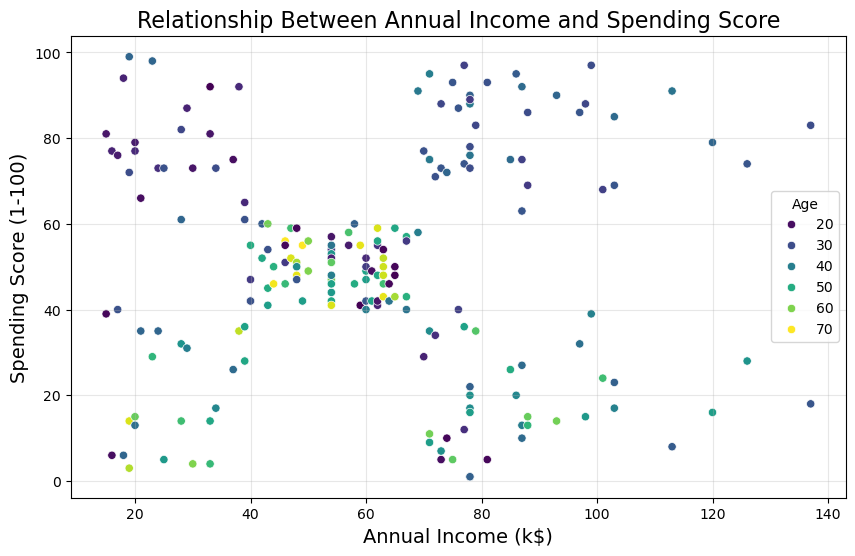

In [35]:
def plot_relationship_income_spending(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age', palette='viridis')
    plt.title('Relationship Between Annual Income and Spending Score', fontsize=16)
    plt.xlabel('Annual Income (k$)', fontsize=14)
    plt.ylabel('Spending Score (1-100)', fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

plot_relationship_income_spending(df)

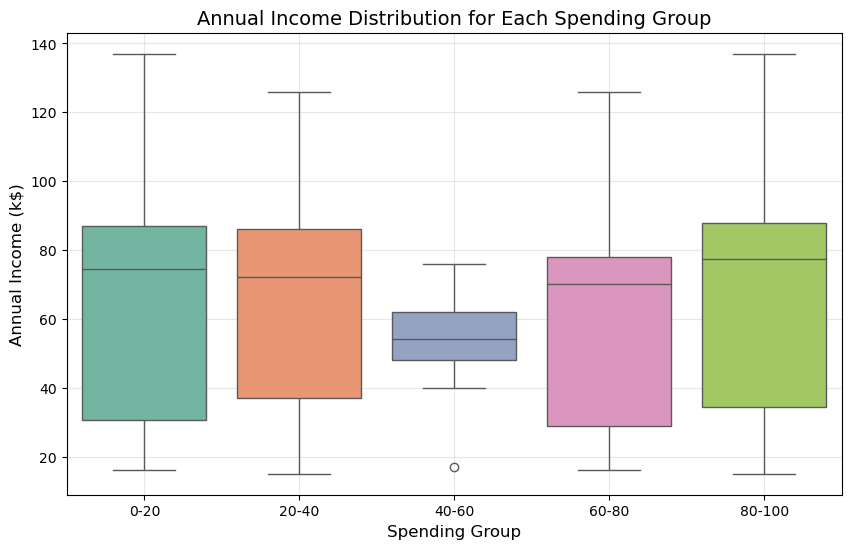

In [33]:
def create_categorical_graph(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Spending Group', y='Annual Income (k$)', hue='Spending Group', palette='Set2')
    plt.title('Annual Income Distribution for Each Spending Group', fontsize=14)
    plt.xlabel('Spending Group', fontsize=12)
    plt.ylabel('Annual Income (k$)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

create_categorical_graph(df) 

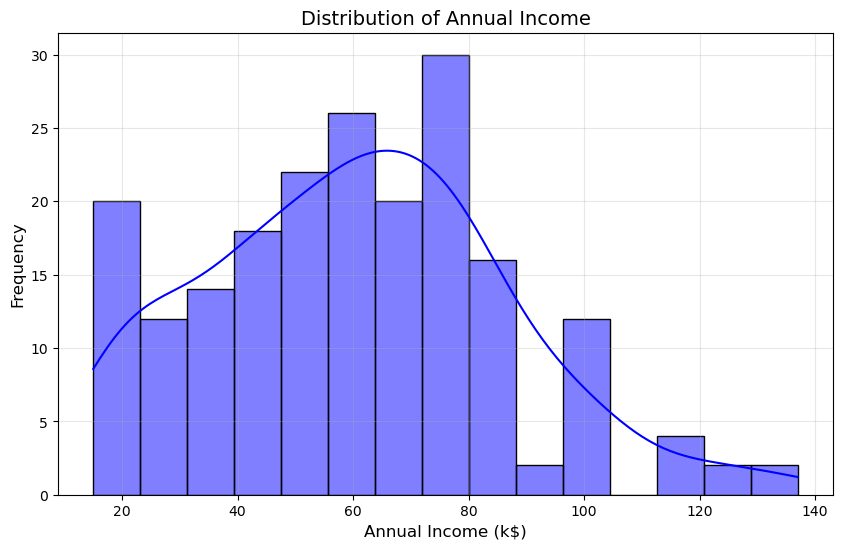

In [31]:
def create_statistical_graph(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Annual Income (k$)'], kde=True, color='blue', bins=15)
    plt.title('Distribution of Annual Income', fontsize=14)
    plt.xlabel('Annual Income (k$)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

create_statistical_graph(df)  

## Applying K-Means clustering

In [39]:
x = df.iloc[:,3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## First we find out how many clusters we need

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [43]:
wcss

[269981.28000000014,
 183069.17582751295,
 106348.37306211119,
 73679.78903948837,
 44454.47647967972,
 37455.98455516028,
 30259.657207285458,
 25022.485004530332,
 24106.045681605978,
 21161.1248973249]

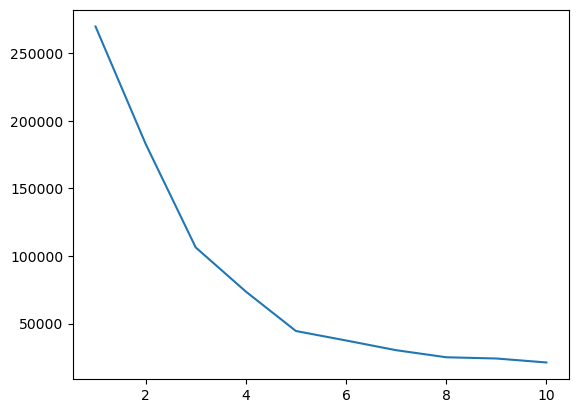

In [45]:
plt.plot(range(1,11),wcss)

In [47]:
kmeans = KMeans(n_clusters=5, init= 'k-means++')
y_kmeans = kmeans.fit_predict(x)

In [49]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [51]:
pd.concat([df,pd.DataFrame(y_kmeans)],axis=1)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Group,Spending Group,0
0,1,Male,19,15,39,10-20,20-40,0
1,2,Male,21,15,81,20-30,80-100,4
2,3,Female,20,16,6,20-30,0-20,0
3,4,Female,23,16,77,20-30,60-80,4
4,5,Female,31,17,40,30-40,40-60,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,30-40,60-80,2
196,197,Female,45,126,28,40-50,20-40,3
197,198,Male,32,126,74,30-40,60-80,2
198,199,Male,32,137,18,30-40,0-20,3


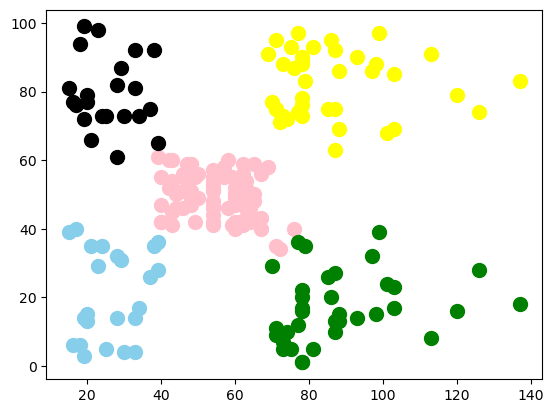

In [59]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='skyblue')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='pink')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='yellow')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s=100, c='green')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s=100, c='black')

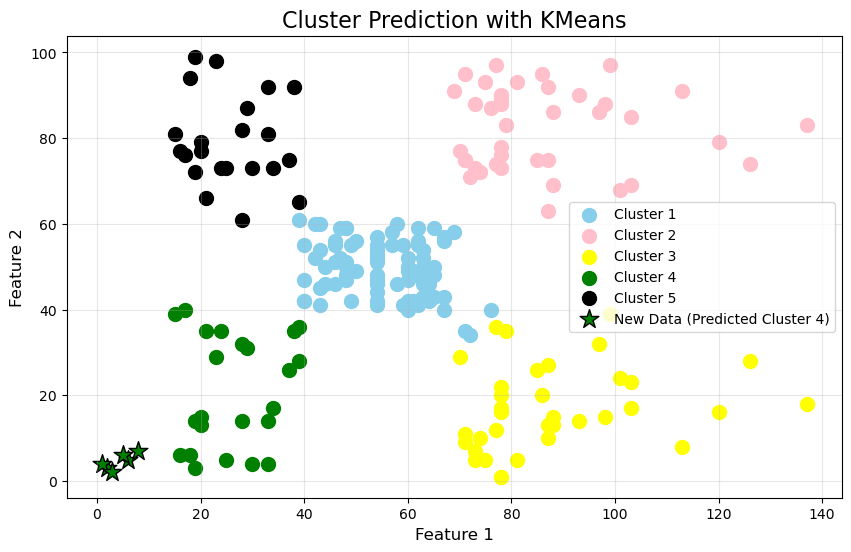

In [101]:
kmeans = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans.fit_predict(x)

new_data = np.array([[2, 3], [6, 5], [1, 4], [8, 7], [5, 6], [3, 2]])

predicted_clusters = kmeans.predict(new_data)

plt.figure(figsize=(10, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='skyblue', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='pink', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='yellow', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='green', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='black', label='Cluster 5')

for i, point in enumerate(new_data):
    cluster_idx = predicted_clusters[i]
    # Plot new data points with their predicted cluster color
    if cluster_idx == 0:
        plt.scatter(point[0], point[1], s=200, c='skyblue', marker='*', edgecolor='black', label=f'New Data (Predicted Cluster 1)' if i == 0 else "")
    elif cluster_idx == 1:
        plt.scatter(point[0], point[1], s=200, c='pink', marker='*', edgecolor='black', label=f'New Data (Predicted Cluster 2)' if i == 0 else "")
    elif cluster_idx == 2:
        plt.scatter(point[0], point[1], s=200, c='yellow', marker='*', edgecolor='black', label=f'New Data (Predicted Cluster 3)' if i == 0 else "")
    elif cluster_idx == 3:
        plt.scatter(point[0], point[1], s=200, c='green', marker='*', edgecolor='black', label=f'New Data (Predicted Cluster 4)' if i == 0 else "")
    else:
        plt.scatter(point[0], point[1], s=200, c='black', marker='*', edgecolor='white', label=f'New Data (Predicted Cluster 5)' if i == 0 else "")

plt.title('Cluster Prediction with KMeans', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

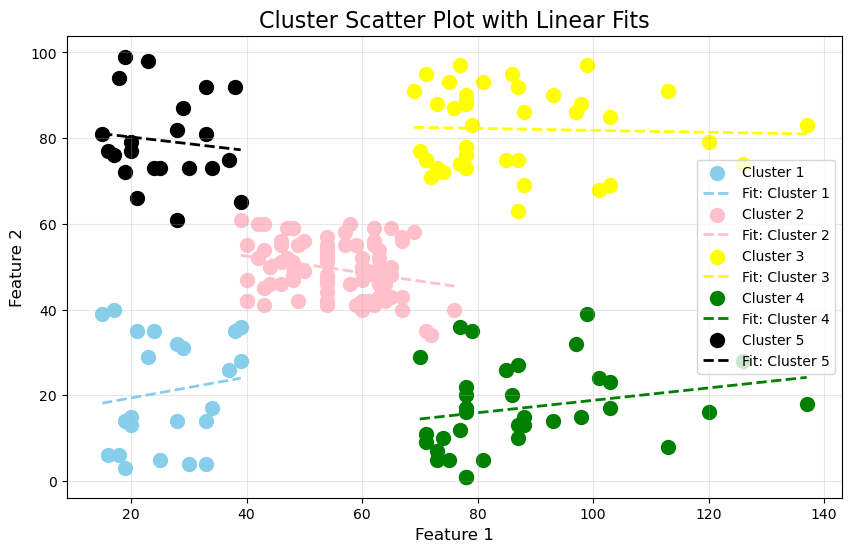

In [61]:
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'red', 'yellow', 'green', 'black']

for cluster in range(5): 
    cluster_points = x[y_kmeans == cluster]  

    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, c=colors[cluster], label=f'Cluster {cluster+1}')

    slope, intercept, r_value, p_value, std_err = linregress(cluster_points[:, 0], cluster_points[:, 1])
    
    x_range = np.linspace(cluster_points[:, 0].min(), cluster_points[:, 0].max(), 100)
    y_fit = slope * x_range + intercept
    
    plt.plot(x_range, y_fit, color=colors[cluster], linestyle='--', linewidth=2, label=f'Fit: Cluster {cluster+1}')

plt.title('Cluster Scatter Plot with Linear Fits', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

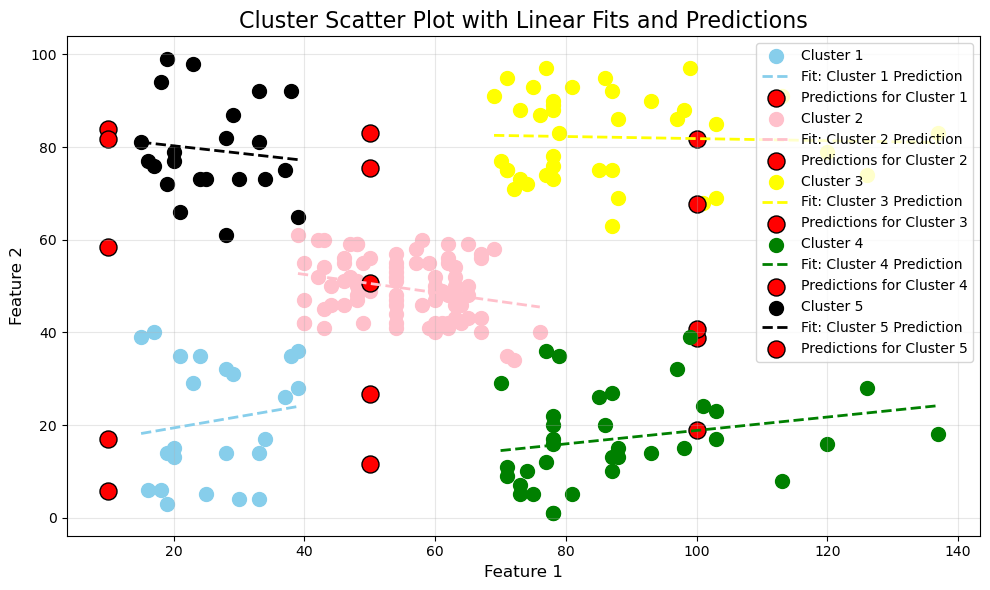

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example: Assuming you have the variable `x` from your clustering and `y_kmeans` for cluster labels

plt.figure(figsize=(10, 6))
colors = ['skyblue', 'pink', 'yellow', 'green', 'black']

# Loop through each cluster
for cluster in range(5):
    # Extract the points for the current cluster
    cluster_points = x[y_kmeans == cluster]  

    # Scatter plot for the current cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=100, c=colors[cluster], label=f'Cluster {cluster+1}')

    # Fit linear regression model for the current cluster
    model = LinearRegression()
    model.fit(cluster_points[:, 0].reshape(-1, 1), cluster_points[:, 1])  # Fit the model

    # Create a range of new x values for predictions (example: ranging from min to max of cluster_points[:, 0])
    x_range = np.linspace(cluster_points[:, 0].min(), cluster_points[:, 0].max(), 100).reshape(-1, 1)

    # Predict y values using the fitted model
    y_pred = model.predict(x_range)

    # Plot the fitted line for the cluster
    plt.plot(x_range, y_pred, color=colors[cluster], linestyle='--', linewidth=2, label=f'Fit: Cluster {cluster+1} Prediction')

    # Predict some new values outside the existing data points (optional)
    x_new = np.array([[10], [50], [100]])  # Example new x values for prediction
    y_new = model.predict(x_new)  # Get the predicted y values for these new x values

    # Plot the new predicted points (using 'o' marker to highlight them)
    plt.scatter(x_new, y_new, color='red', marker='o', s=150, edgecolor='black', label=f'Predictions for Cluster {cluster+1}')

# Title and labels for the plot
plt.title('Cluster Scatter Plot with Linear Fits and Predictions', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()
